<div class="table-of-contents" style="background-color:#1E1E1E; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#00F1FF;">TOC</h1>
  <ol>
     <li><a href="#1" style="color: #00F1FF;">1. Imports</a></li>
    <li><a href="#2" style="color: #00F1FF;">2. Data Analysis</a></li>
    <li><a href="#3" style="color: #00F1FF;">3. Data Preprocessing</a>
    <li><a href="#4" style="color: #00F1FF;">4. Model Implementation</a></li>
    <li><a href="#5" style="color: #00F1FF;">5. Evaluation</a></li>
    <li><a href="#6" style="color: #00F1FF;">6. Thank You</a></li>  
  </ol>
</div>


<a id="1"></a>
<h1 style='background:#283149; border:0; color:#FFFFFF; 
           box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
           transform: rotateX(10deg);'>
    <center style='color:#00B4D8;'>Imports</center>
</h1>

# Imports

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<a id="2"></a>
<h1 style='background:#283149; border:0; color:#FFFFFF; 
           box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
           transform: rotateX(10deg);'>
    <center style='color:#00B4D8;'>Data Analysis</center>
</h1>

# Data Analysis

In [4]:
df = pd.read_csv('../breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [6]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [10]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [11]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [12]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [13]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

<a id="3"></a>
<h1 style='background:#283149; border:0; color:#FFFFFF; 
           box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
           transform: rotateX(10deg);'>
    <center style='color:#00B4D8;'>Data Preprocessing</center>
</h1>

# Data Preprocessing


In [14]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

## Encode the target

In [15]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

## Get highly correlated features

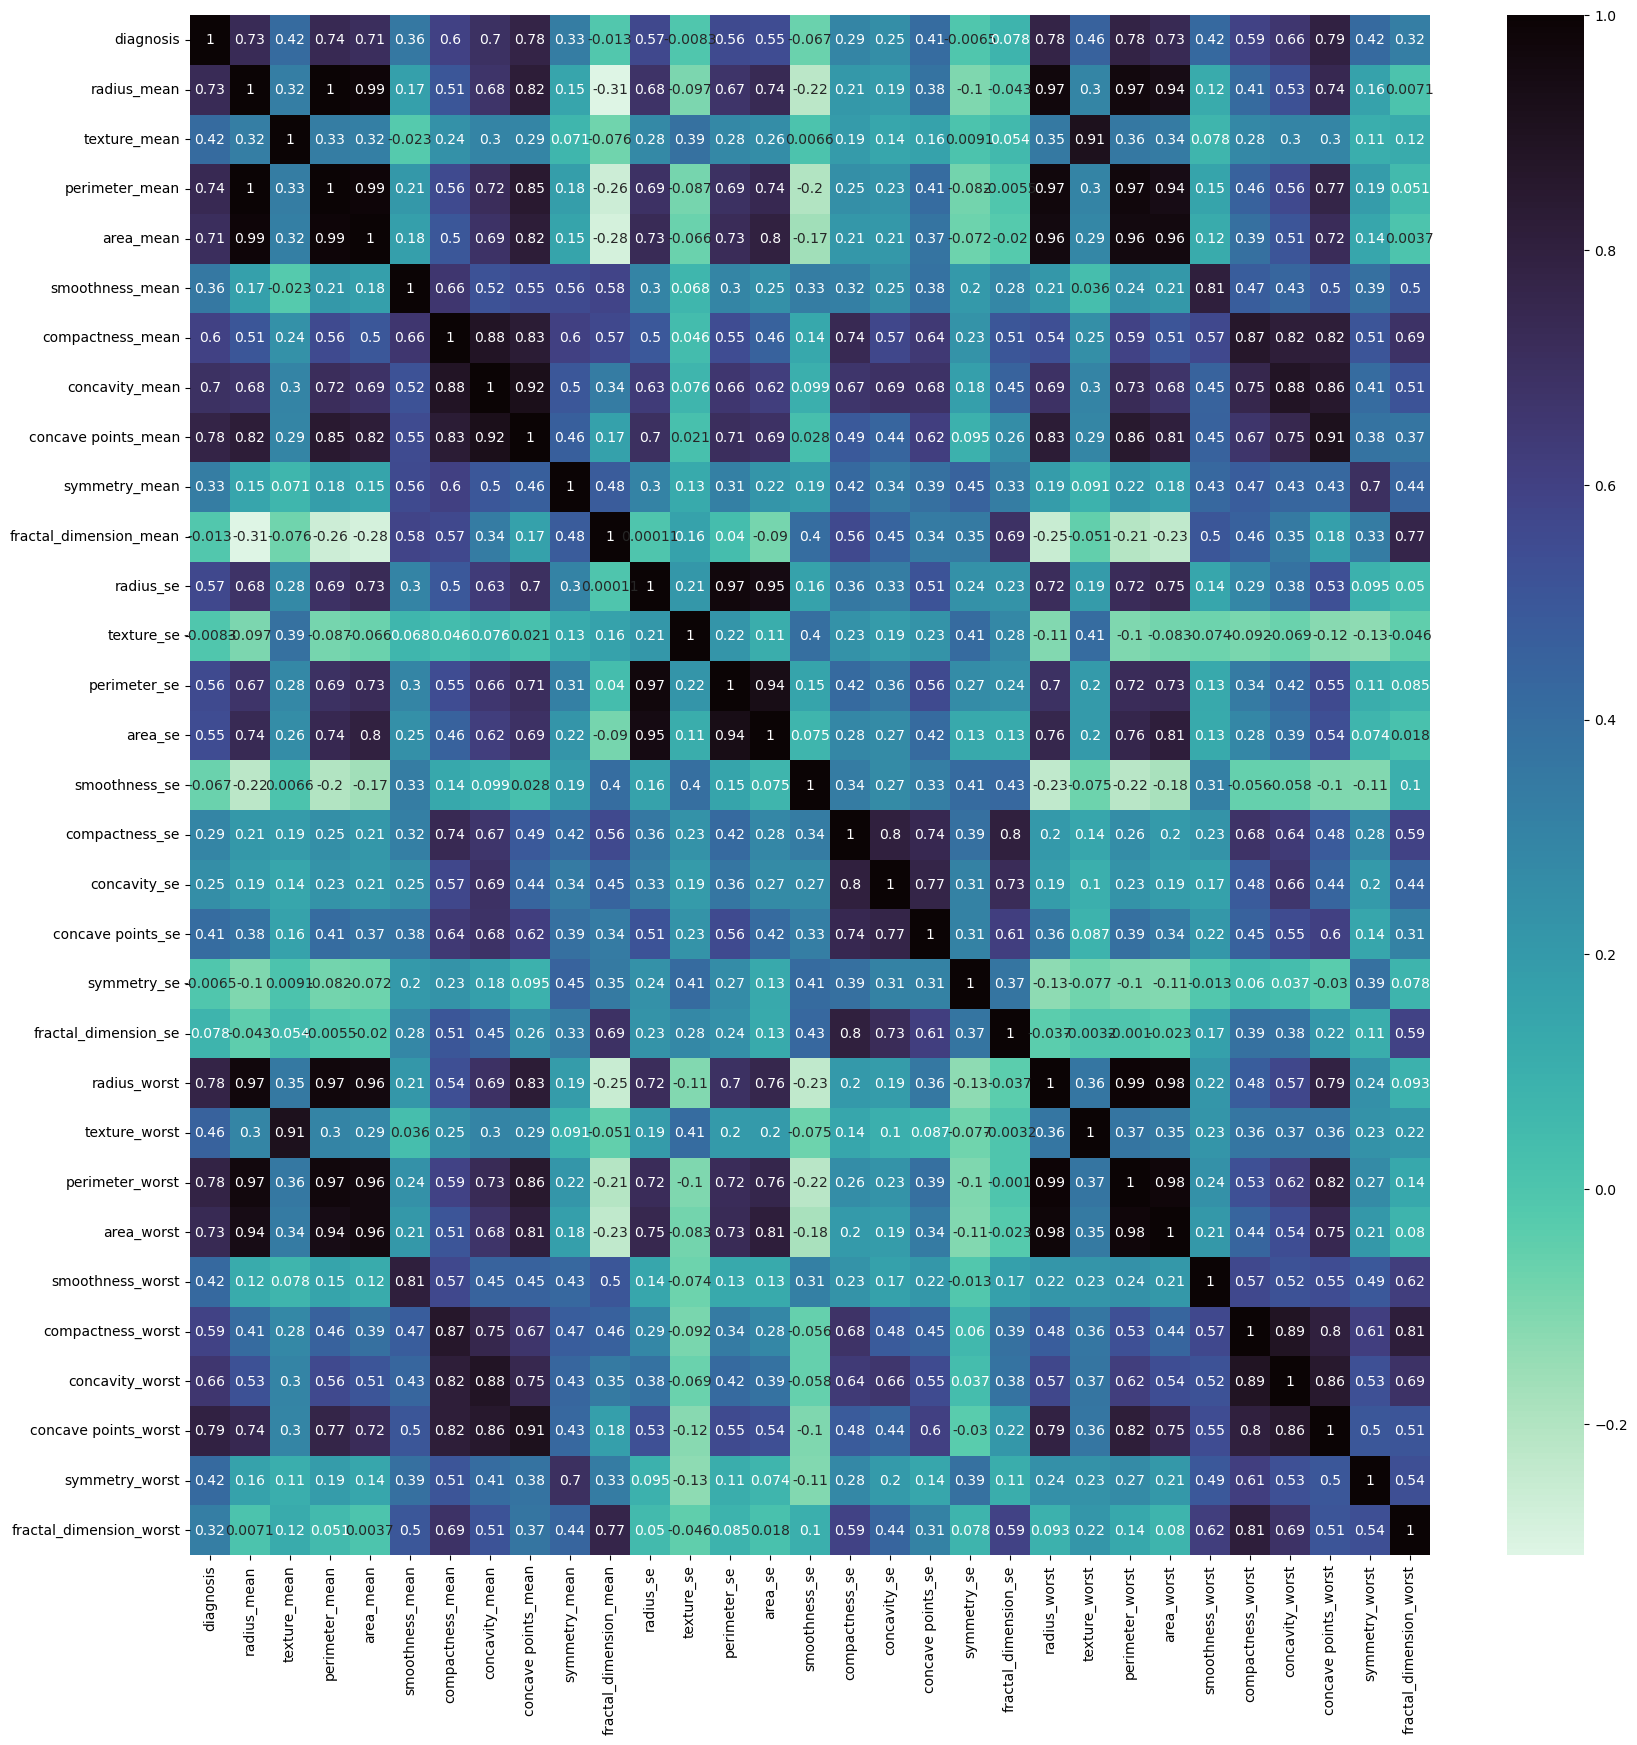

In [16]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [17]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [18]:
X = df[names].values

<a id="4"></a>
<h1 style='background:#283149; border:0; color:#FFFFFF; 
           box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
           transform: rotateX(10deg);'>
    <center style='color:#00B4D8;'>Model Implementation</center>
</h1>

# Model Implementation

##  The main steps of the PCA algorithm are as follows:


1. Compute the mean of the input data along each feature dimension.
2. Subtract the mean from the input data to center it around zero.
3. Compute the covariance matrix of the centered input data.
4. Compute the eigenvectors and eigenvalues of the covariance matrix.
5. Keep only the first n_components eigenvectors as the principal components.
6. Compute the explained variance ratio for each principal component.
7. Transform the input data by projecting it onto the principal components.

### The mean of the input data along each feature dimension is computed as:

**
\begin{equation}
\boldsymbol{\mu} = \frac{1}{n}\sum_{i=1}^{n}\mathbf{x}_i
\end{equation}
**

**where $n$ is the number of samples and $\mathbf{x}_i$ is the feature vector of the $i$th sample.**

### The centered input data is computed as:

**
\begin{equation}
\mathbf{x}_i' = \mathbf{x}_i - \boldsymbol{\mu}
\end{equation}
**


**where $\mathbf{X}$ is the input data matrix with shape $(n, p)$, $n$ is the number of samples, and $p$ is the number of features.**

### The covariance matrix of the centered input data is computed as:

**
\begin{equation}
\mathbf{C} = \frac{1}{n-1}\sum_{i=1}^{n}(\mathbf{x}_i' \cdot \mathbf{x}_i'^T)
\end{equation}
**

**where $\mathbf{C}$ is the covariance matrix with shape $(p, p)$.**

### The eigenvectors and eigenvalues of the covariance matrix are computed as:


**\begin{equation}
\mathbf{C} \cdot \mathbf{v}_i = \lambda_i \cdot \mathbf{v}_i
\end{equation}**

**where $\mathbf{v}_i$ is the $i$th eigenvector with length $p$, and $\lambda_i$ is the corresponding eigenvalue.**


### Here, we keep only the first 'n_components' eigenvectors as the principal components.


### The explained variance ratio for each principal component is computed as:

**\begin{equation}
\mathrm{ExplainedVarianceRatio_i} = \frac{\lambda_i}{\sum{j=1}^{p}\lambda_j}
\end{equation}**

**where $ExplainedVarianceRatio_i$ is the explained variance ratio for the $i$th principal component.**


### The transformed data is computed as:

**
\begin{equation}
\mathbf{X}\mathrm{transformed} = \mathbf{X}\mathrm{centered} \cdot \mathbf{V}
\end{equation}
**

**where $\mathbf{V}$ is the matrix of principal components with shape $(p, k)$, $\mathbf{X}\mathrm{centered}$ is the centered input data matrix with shape $(n, p)$, and $\mathbf{X}\mathrm{transformed}$ is the transformed data matrix with shape $(n, k)$.**

In [19]:
class PCA:
    """
    Principal Component Analysis (PCA) class for dimensionality reduction.
    """
    
    def __init__(self, n_components):
        """
        Constructor method that initializes the PCA object with the number of components to retain.
        
        Args:
        - n_components (int): Number of principal components to retain.
        """
        self.n_components = n_components
        
    def fit(self, X):
        """
        Fits the PCA model to the input data and computes the principal components.
        
        Args:
        - X (numpy.ndarray): Input data matrix with shape (n_samples, n_features).
        """
        # Compute the mean of the input data along each feature dimension.
        mean = np.mean(X, axis=0)
        
        # Subtract the mean from the input data to center it around zero.
        X = X - mean
        
        # Compute the covariance matrix of the centered input data.
        cov = np.cov(X.T)
        
        # Compute the eigenvectors and eigenvalues of the covariance matrix.
        eigenvalues, eigenvectors = np.linalg.eigh(cov)
        # Reverse the order of the eigenvalues and eigenvectors.
        eigenvalues = eigenvalues[::-1]
        eigenvectors = eigenvectors[:,::-1]
        
        # Keep only the first n_components eigenvectors as the principal components.
        self.components = eigenvectors[:,:self.n_components]
        
        # Compute the explained variance ratio for each principal component.
        # Compute the total variance of the input data
        total_variance = np.sum(np.var(X, axis=0))

        # Compute the variance explained by each principal component
        self.explained_variances = eigenvalues[:self.n_components]

        # Compute the explained variance ratio for each principal component
        self.explained_variance_ratio_ = self.explained_variances / total_variance
        
    def transform(self, X):
        """
        Transforms the input data by projecting it onto the principal components.
        
        Args:
        - X (numpy.ndarray): Input data matrix with shape (n_samples, n_features).
        
        Returns:
        - transformed_data (numpy.ndarray): Transformed data matrix with shape (n_samples, n_components).
        """
        # Center the input data around zero using the mean computed during the fit step.
        X = X - np.mean(X, axis=0)
        
        # Project the centered input data onto the principal components.
        transformed_data = np.dot(X, self.components)
        
        return transformed_data
    
    def fit_transform(self, X):
        """
        Fits the PCA model to the input data and computes the principal components then
        transforms the input data by projecting it onto the principal components.
        
        Args:
        - X (numpy.ndarray): Input data matrix with shape (n_samples, n_features).
        """
        self.fit(X)
        transformed_data = self.transform(X)
        return transformed_data

In [20]:
pca = PCA(2)

In [21]:
pca.fit(X)

In [22]:
pca.explained_variance_ratio_

array([0.98377428, 0.01620498])

In [23]:
X_transformed = pca.transform(X)

In [24]:
X_transformed[:,1].shape

(569,)

In [25]:
fig = px.scatter(x=X_transformed[:,0], y=X_transformed[:,1])
fig.update_layout(
    title="PCA transformed data for breast cancer dataset",
    xaxis_title="PC1",
    yaxis_title="PC2"
)
fig.show()

<a id="6"></a>
<h1 style='background:#283149; border:0; color:#FFFFFF; 
           box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
           transform: rotateX(10deg);'>
    <center style='color:#00B4D8;'>Thank you</center>
</h1>


  
# Thank you
**Thank you for going through this notebook**

**If you have any suggestions please let me know**

<div style="padding:10px; 
            color:#333333;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style:solid;
            border-color:#666666;
            background-color:#F9F9F9;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Machine Learning From Scratch Series</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/linear-regression-from-scratch" style="color:#0072B2">1 - Linear Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch" style="color:#0072B2">2 -  Logistic Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch" style="color:#0072B2">3 - KMeans</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/decision-tree-classifier-from-scratch" style="color:#0072B2">4 - Decision Trees</a>
        </li> 
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/random-forest-classifier-from-scratch" style="color:#0072B2">5 -  Random Forest</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/knn-from-scratch" style="color:#0072B2">6 - KNearestNeighbor</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/pca-from-scratch?scriptVersionId=121402593" style="color:#0072B2">7 - PCA</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch" style="color:#0072B2">8 - SVM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/naive-bayes-from-scratch" style="color:#0072B2">9 - Naive Baye</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/optimized-neural-network-from-scratch" style="color:#0072B2">10 - Optimized Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch" style="color:#0072B2">11 - Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/cnn-from-scratch" style="color:#0072B2">12 - CNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/rnn-from-scratch" style="color:#0072B2">13 - RNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/lstm-from-scratch" style="color:#0072B2">14 - LSTM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/gru-from-scratch" style="color:#0072B2">15 - GRU</a>
        </li>
    </ul>
</div>